In [ ]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

In [8]:
import pandas as pd
import requests

# Step 1: Use requests with headers
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Step 2: Pass HTML text to pandas.read_html()
tables = pd.read_html(response.text)

# Step 3: Find the Tesla revenue table
for table in tables:
    if "Tesla Quarterly Revenue" in table.columns[0]:
        tesla_revenue = table
        break

# Step 4: Clean and convert
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r"[\$,]", "", regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

# Step 5: Display the last 5 rows
tesla_revenue.tail()


/var/folders/cm/xm24zftx5ts_6fvqln7hc5q00000gn/T/ipykernel_90780/3487244046.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


,Date,Revenue
59,2010-06-30,28.0
60,2010-03-31,21.0
61,2009-12-31,NaN
62,2009-09-30,46.0
63,2009-06-30,27.0


In [9]:
import yfinance as yf
import pandas as pd

# Fetch GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
import pandas as pd
import requests

# Step 1: Set URL and headers
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

# Step 2: Get HTML content
response = requests.get(url, headers=headers)

# Step 3: Parse all tables using pandas
tables = pd.read_html(response.text)

# Step 4: Find the table with 'GameStop Quarterly Revenue'
for table in tables:
    if "GameStop Quarterly Revenue" in table.columns[0]:
        gme_revenue = table
        break

# Step 5: Clean and convert
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r"[\$,]", "", regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Step 6: Display last 5 rows
gme_revenue.tail()


/var/folders/cm/xm24zftx5ts_6fvqln7hc5q00000gn/T/ipykernel_90780/608577796.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


,Date,Revenue
60,2010-01-31,3524
61,2009-10-31,1835
62,2009-07-31,1739
63,2009-04-30,1981
64,2009-01-31,3492


Matplotlib is building the font cache; this may take a moment.


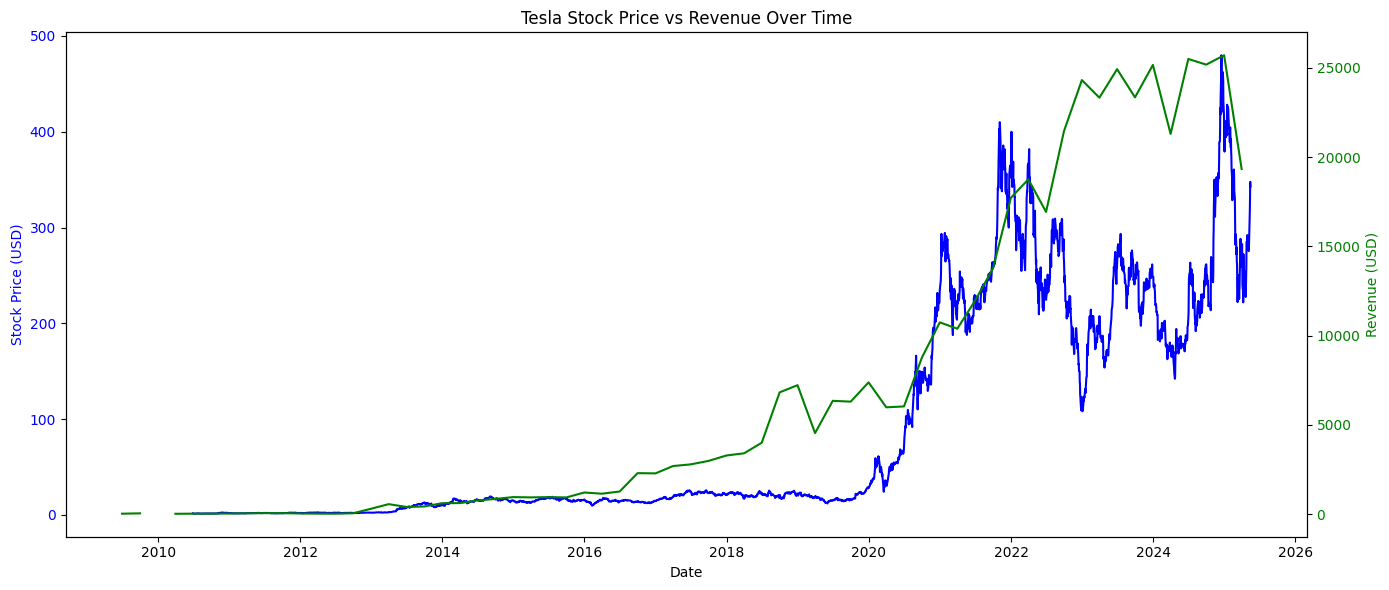

In [11]:
import matplotlib.pyplot as plt

# Ensure Date columns are datetime for correct plotting
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Define the graphing function
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f"{stock_name} Stock Price vs Revenue Over Time")
    fig.tight_layout()
    plt.show()

# Plot Tesla data
make_graph(tesla_data, tesla_revenue, "Tesla")


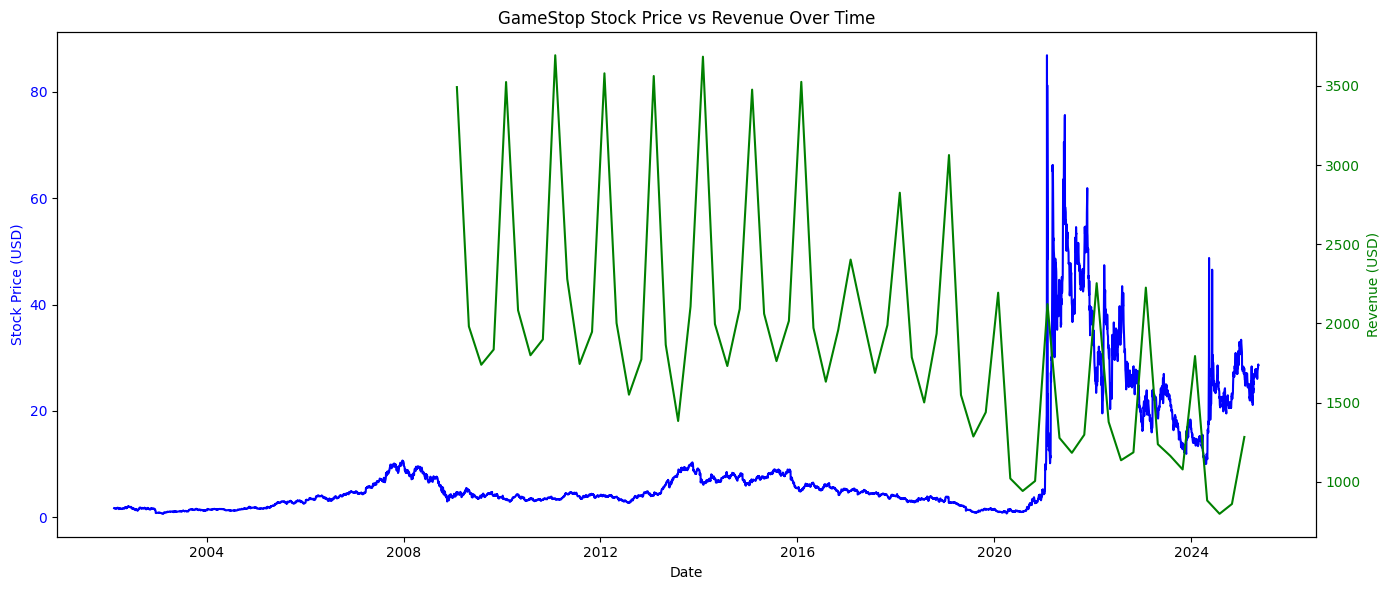

In [12]:
# Ensure dates are datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Reuse the same graphing function
make_graph(gme_data, gme_revenue, "GameStop")
